In [31]:
import pandas as pd
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec #install gensim # had to use this: pip install --upgrade gensim smart_open protobuf==3.20.0
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dxcas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dxcas\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dxcas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\dxcas\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\dxcas\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [33]:
data = pd.read_pickle('processed_train.pkl')

### Sentiment Analysis

In [34]:
sia = SentimentIntensityAnalyzer()
data['comment_score'] = data['comment'].apply(lambda x: sia.polarity_scores(x)['compound'])
data['parent_comment_score'] = data['parent_comment'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [35]:
data.head()

,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,label,comment_tokens,parent_comment_tokens,comment_score,parent_comment_score
0,"yeah, they only have captain america, iron man...",RedBarrel,marvelstudios,1,1,0,2015-11,2015-11-12 19:18:43,kind of defeats the ideas of a shared universe...,1,"[yeah, ,, captain, america, ,, iron, man, ,, s...","[kind, defeat, idea, shared, universe, differe...",0.5423,0.8429
1,just pretend there is nothing wrong with this ...,Swopyx,FIFA,7,-1,-1,2016-11,2016-11-19 10:24:32,something sketchy going on in wl? i have playe...,0,"[pretend, nothing, wrong, game, like, 95, %, s...","[something, sketchy, going, wl, ?, played, eve...",0.5653,0.8611
2,i thought i had killed somebody by administeri...,fathompin,exmormon,12,12,0,2016-05,2016-05-10 22:33:28,want to repent to this sub for stupid and misg...,1,"[thought, killed, somebody, administering, pro...","[want, repent, sub, stupid, misguided, thing, ...",-0.8807,-0.7509
3,"it is cool, as long as you keep one tire on yo...",mahacctissoawsum,videos,2,2,0,2012-09,2012-09-20 01:32:52,"but there is a double line, he cannot legally ...",1,"[cool, ,, long, keep, one, tire, side, .]","[double, line, ,, not, legally, pas, !]",0.3182,-0.1867
4,"no, i am pretty sure it is an ar-15.",reg55000,The_Donald,1,1,0,2016-06,2016-06-14 06:41:03,top left is definitely ak-47.,1,"[no, ,, pretty, sure, ar-15, .]","[top, left, definitely, ak-47, .]",0.5106,0.5423


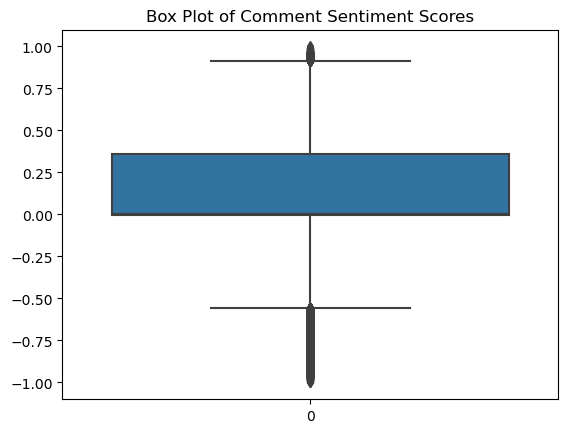

In [36]:
sns.boxplot(data['comment_score'])
plt.title('Box Plot of Comment Sentiment Scores')
plt.show()

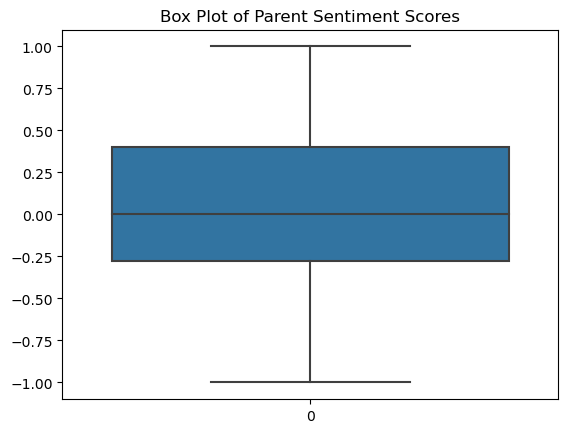

In [37]:
sns.boxplot(data['parent_comment_score'])
plt.title('Box Plot of Parent Sentiment Scores')
plt.show()

C:\Users\dxcas\AppData\Local\Temp\ipykernel_13156\2726375268.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['comment_score'], shade=True, color = 'blue')
C:\Users\dxcas\AppData\Local\Temp\ipykernel_13156\2726375268.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['parent_comment_score'], shade = True, color='red')


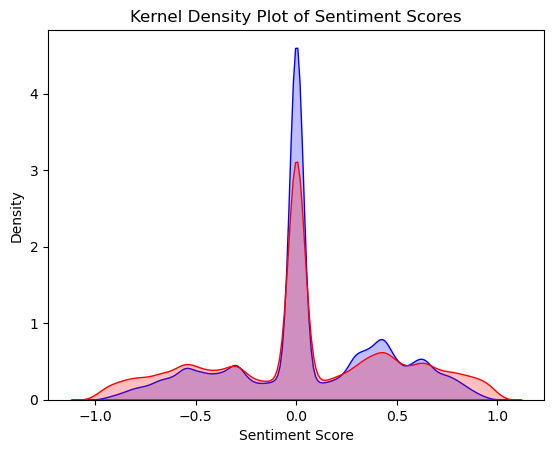

In [38]:
sns.kdeplot(data['comment_score'], shade=True, color = 'blue')
sns.kdeplot(data['parent_comment_score'], shade = True, color='red')
plt.title('Kernel Density Plot of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()

In [39]:
def sentiment(score):
    if (score >= 0.25):
        return 'positive'
    elif (score <= -0.25):
        return 'negative'
    else:
        return 'neutral'
    
data['weighted_comment_sentiment_score'] = data['comment_score'].apply(sentiment)
data['weighted_parent_sentiment_score'] = data['parent_comment_score'].apply(sentiment)
data.head()

,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,label,comment_tokens,parent_comment_tokens,comment_score,parent_comment_score,weighted_comment_sentiment_score,weighted_parent_sentiment_score
0,"yeah, they only have captain america, iron man...",RedBarrel,marvelstudios,1,1,0,2015-11,2015-11-12 19:18:43,kind of defeats the ideas of a shared universe...,1,"[yeah, ,, captain, america, ,, iron, man, ,, s...","[kind, defeat, idea, shared, universe, differe...",0.5423,0.8429,positive,positive
1,just pretend there is nothing wrong with this ...,Swopyx,FIFA,7,-1,-1,2016-11,2016-11-19 10:24:32,something sketchy going on in wl? i have playe...,0,"[pretend, nothing, wrong, game, like, 95, %, s...","[something, sketchy, going, wl, ?, played, eve...",0.5653,0.8611,positive,positive
2,i thought i had killed somebody by administeri...,fathompin,exmormon,12,12,0,2016-05,2016-05-10 22:33:28,want to repent to this sub for stupid and misg...,1,"[thought, killed, somebody, administering, pro...","[want, repent, sub, stupid, misguided, thing, ...",-0.8807,-0.7509,negative,negative
3,"it is cool, as long as you keep one tire on yo...",mahacctissoawsum,videos,2,2,0,2012-09,2012-09-20 01:32:52,"but there is a double line, he cannot legally ...",1,"[cool, ,, long, keep, one, tire, side, .]","[double, line, ,, not, legally, pas, !]",0.3182,-0.1867,positive,neutral
4,"no, i am pretty sure it is an ar-15.",reg55000,The_Donald,1,1,0,2016-06,2016-06-14 06:41:03,top left is definitely ak-47.,1,"[no, ,, pretty, sure, ar-15, .]","[top, left, definitely, ak-47, .]",0.5106,0.5423,positive,positive


In [40]:
contingency_table = pd.crosstab(data['label'], data['weighted_comment_sentiment_score'])

# Display the contingency table
print(contingency_table)

weighted_comment_sentiment_score  negative  neutral  positive
label                                                        
0                                    18868    52341     29872
1                                    21335    45873     33865


In [41]:
from scipy.stats import chi2_contingency

chi2, p, _, _ = chi2_contingency(contingency_table)
print(f'Chi-Square Value: {chi2}')
print(f'P-value: {p}')

Chi-Square Value: 827.4952244571738
P-value: 2.049722688999676e-180


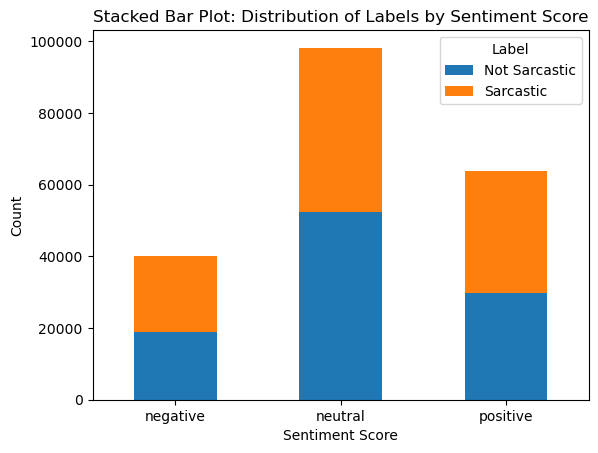

In [42]:
stacked_data = data.groupby(['weighted_comment_sentiment_score', 'label']).size().unstack().fillna(0)

stacked_data.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot: Distribution of Labels by Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Label', labels=['Not Sarcastic', 'Sarcastic'])
plt.show()

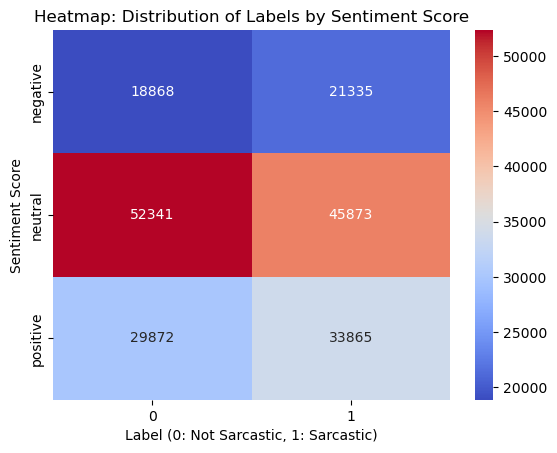

In [43]:
heatmap_data = data.groupby(['weighted_comment_sentiment_score', 'label']).size().unstack().fillna(0)
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm')
plt.title('Heatmap: Distribution of Labels by Sentiment Score')
plt.xlabel('Label (0: Not Sarcastic, 1: Sarcastic)')
plt.ylabel('Sentiment Score')
plt.show()

### Basic Text Features
- extracted these features mostly from the original sentences
- extracted token count, unique token count and mean token length

In [44]:
#data = data[['label','comment', 'parent_comment']]
###pre-tokenised###
# Word Count
data['comment_word_count'] = data['comment'].apply(lambda x: len(str(x).split()))
data['parent_comment_word_count'] = data['parent_comment'].apply(lambda x: len(str(x).split()))
data['comment_token_count'] = data['comment_tokens'].apply(lambda x: len(x))
data['parent_comment_token_count'] = data['parent_comment_tokens'].apply(lambda x: len(x))

# Unique Word Count
data['comment_unique_word_count'] = data['comment'].apply(lambda x: len(set(str(x).split())))
data['parent_comment_unique_word_count'] = data['parent_comment'].apply(lambda x: len(set(str(x).split())))
data['comment_unique_token_count'] = data['comment_tokens'].apply(lambda x: len(set(x)))
data['parent_comment_unique_token_count'] = data['parent_comment_tokens'].apply(lambda x: len(set(x)))

# Stop Word Count
stop = stopwords.words('english')
data['comment_stopword_count'] = data['comment'].apply(lambda x: len([word for word in str(x).split() if word.lower() in stop]))
data['parent_comment_stopword_count'] = data['parent_comment'].apply(lambda x: len([word for word in str(x).split() if word.lower() in stop]))

# Mean Word Length
data['comment_mean_word_length'] = data['comment'].apply(lambda x: np.mean([len(word) for word in str(x).split()]))
data['parent_comment_mean_word_length'] = data['parent_comment'].apply(lambda x: np.mean([len(word) for word in str(x).split()]))
data['comment_mean_token_length'] = data['comment_tokens'].apply(lambda x: np.mean([len(token) for token in x]))
data['parent_comment_mean_token_length'] = data['parent_comment_tokens'].apply(lambda x: np.mean([len(token) for token in x]))

# Character Count
data['comment_char_count'] = data['comment'].apply(lambda x: len(str(x)))
data['parent_comment_char_count'] = data['parent_comment'].apply(lambda x: len(str(x)))

# Punctuation Count
data['comment_punctuation_count'] = data['comment'].apply(lambda x: len([char for char in str(x) if char in string.punctuation]))
data['parent_comment_punctuation_count'] = data['parent_comment'].apply(lambda x: len([char for char in str(x) if char in string.punctuation]))

# Hashtag and Number Count
data['comment_hashtag_count'] = data['comment'].apply(lambda x: len([word for word in str(x).split() if word.startswith('#')]))
data['parent_comment_hashtag_count'] = data['parent_comment'].apply(lambda x: len([word for word in str(x).split() if word.startswith('#')]))

data['comment_number_count'] = data['comment'].apply(lambda x: len([word for word in str(x).split() if word.isdigit()]))
data['parent_comment_number_count'] = data['parent_comment'].apply(lambda x: len([word for word in str(x).split() if word.isdigit()]))

c:\Users\dxcas\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\dxcas\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\dxcas\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\dxcas\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


### Bag of Words

In [45]:
documents_comments = data['comment_tokens'].apply(lambda tokens_list:' '.join(tokens_list))
documents_parent_comments = data['parent_comment_tokens'].apply(lambda tokens_list:' '.join(tokens_list))

In [46]:
vectorizer_comments = CountVectorizer(min_df = 4)
bow_matrix_comments = vectorizer_comments.fit_transform(documents_comments)
bow_matrix_csr = csr_matrix(bow_matrix_comments)
data['comment_bow'] = [row for row in bow_matrix_csr]


In [47]:
vectorizer_parent_comments = CountVectorizer(min_df = 4)
bow_matrix_parent_comments = vectorizer_parent_comments.fit_transform(documents_parent_comments)
bow_matrix_csr_parent = csr_matrix(bow_matrix_parent_comments)
data['parent_comment_bow'] = [row for row in bow_matrix_csr_parent]

In [ ]:
feature_names_comments = vectorizer_comments.get_feature_names_out() # to reverse
def bow_to_words(bow_vector, feature_names):
    # Convert the sparse matrix row to a dense array
    array = bow_vector.toarray().flatten()
    # Get the tokens that have a count > 0
    tokens = [feature_names[i] for i, count in enumerate(array) if count > 0]
    return tokens

### TD-IDF

In [48]:
tdvectorizer_comments = TfidfVectorizer(min_df = 4)
tdidf_matrix_comments = tdvectorizer_comments.fit_transform(documents_comments)
tdidf_matrix_csr = csr_matrix(tdidf_matrix_comments)
data['comment_tdidf'] = [row for row in tdidf_matrix_csr]

In [49]:
tdvectorizer_parent_comments = TfidfVectorizer(min_df = 4)
tdidf_matrix_parent_comments = tdvectorizer_parent_comments.fit_transform(documents_parent_comments)
tdidf_matrix_csr_parent = csr_matrix(tdidf_matrix_parent_comments)
data['parent_comment_tdidf'] = [row for row in tdidf_matrix_csr_parent]

### POS Tagging

In [50]:
data['comment_pos'] = data['comment'].apply(lambda x: nltk.pos_tag(nltk.word_tokenize(x)))
data['parent_comment_pos'] = data['parent_comment'].apply(lambda x: nltk.pos_tag(nltk.word_tokenize(x)))

### NER Tagging

In [51]:
"""
def ner_from_pos(pos_tokens):
    named_entities = []
    for chunk in nltk.ne_chunk(pos_tokens):
        if hasattr(chunk, 'label'):
            named_entities.append((chunk.label(), ' '.join(c[0] for c in chunk)))
    return named_entities

data['comment_ner'] = data['comment_pos'].apply(ner_from_pos)
data['parent_comment_ner'] = data['parent_comment_pos'].apply(ner_from_pos)
"""

"\ndef ner(text):\n    named_entities = []\n    for sent in nltk.sent_tokenize(text):\n        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):\n            if hasattr(chunk, 'label'):\n                named_entities.append((chunk.label(), ' '.join(c[0] for c in chunk)))\n    return named_entities\n\ndata['comment_ner'] = data['comment'].apply(ner)\n\ndata['parent_comment_ner'] = data['parent_comment'].apply(ner)\n"

In [52]:
data.to_pickle("for_ML_full.pkl")

In [1]:
#data.columns
df = data.head(10)
print(df['comment_bow'].iloc[0])
print(bow_to_words(df['comment_bow'].iloc[0], feature_names_comments))

NameError: name 'data' is not defined

### Splitting into Training and Test Set 
Done with stratified random sampling

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X = data.drop('label', axis = 1)
y = data['label']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [57]:
train = pd.concat([X_train,y_train], axis = 1)
test = pd.concat([X_test,y_test], axis = 1)

In [58]:
train.to_pickle("train.pkl")
test.to_pickle("test.pkl")